# Assumptions

1. Steady-state conditions
2. Pressure is 1 bar
3. Gas behaves ideally
4. Ore only contains SiO2 and Al2O3 impurities
5. Conventional blast furnace
6. SiO2 and Al2O3 is unreactive
7. Incompressible Solids and Liquids
8. SI units is used for rates i.e. mol/s and m^3/s and the time unit used for tons is hour except for biomass
9. All of oxygen is converted

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
import numpy as np
from numpy.polynomial.polynomial import polyfit
import sympy as sym
import scipy.constants as spc
from IPython.display import display

# Molecular weight of chemicals in the blast furnace

In [2]:
mol_weight_fe = 55.845 # in grams/mol
mol_weight_fe2o3 = 12.01070 # in grams/mol 
mol_weight_c = 60.0843 # in grams/mol
mol_weight_co = 28.0101 # in grams/mol
mol_weight_co2 = 44.0095 # in grams/mol
mol_weight_n2 = 28.01340 # in grams/mol
mol_weight_o2 = 31.99880 # in grams/mol
mol_weight_al2o3 = 101.96128 # in grams/mol
mol_weight_sio2 = 60.0843 # in grams/mol

# Mass Balance Analysis
species are placed together on the basis of the Fig

In [3]:
blast_furnace = []
blast_furnace.append(sym.var('ne1_fe2o3 ne1_sio2 ne1_al2o3')) # entry 1
blast_furnace.append(sym.var('ne2_o2 ne2_n2')) # entry 2
blast_furnace.append(sym.var('ne3_c ne3_sio2')) # entry 3
blast_furnace.append(sym.var('ns4_co ns4_co2 ns4_n2')) # split 4
blast_furnace.append(sym.var('ns5_fe ns5_c')) # split 5
blast_furnace.append(sym.var('ns6_sio2 ns6_al2o3')) # split 6

display(blast_furnace)

[(ne1_fe2o3, ne1_sio2, ne1_al2o3),
 (ne2_o2, ne2_n2),
 (ne3_c, ne3_sio2),
 (ns4_co, ns4_co2, ns4_n2),
 (ns5_fe, ns5_c),
 (ns6_sio2, ns6_al2o3)]

### Number of equations
this is the basis of the mass balance equation. This will be the generation and consumption ratio present for each species.

In [4]:
ratio = [sym.var('X1 X2 X3')]

display(ratio)
for r in ratio:
    length = len(r)

[(X1, X2, X3)]

In [5]:
variables =[]
for x in ratio:
    for i in x:
        variables.append(i)
for b in blast_furnace:
    for v in b:
        variables.append(v)
        
display(variables)

[X1,
 X2,
 X3,
 ne1_fe2o3,
 ne1_sio2,
 ne1_al2o3,
 ne2_o2,
 ne2_n2,
 ne3_c,
 ne3_sio2,
 ns4_co,
 ns4_co2,
 ns4_n2,
 ns5_fe,
 ns5_c,
 ns6_sio2,
 ns6_al2o3]

## Mass Balance Equations
All the species have a equation that will be used to solve their unknown values. There are also relations which give more relationships between the species. These are assumptions that are being made about the volume ratio, molar weight percent composition etc...

In [6]:
chemical = [
    sym.Eq(0, ne1_fe2o3 - X1),
    sym.Eq(0, 2*X2 - ns4_co - 3*X1),
    sym.Eq(0, 2*X1 - ns5_fe),
    sym.Eq(0, 3*X1 - ns4_co2 - X2 + X3),
    sym.Eq(0, ne3_c - ns5_c - X2 - X3),
    sym.Eq(0, ne2_o2 - X3),
    sym.Eq(0, ne2_n2 - ns4_n2),
    sym.Eq(0, ne1_sio2 + ne3_sio2 - ns6_sio2),
    sym.Eq(0, ne1_al2o3 - ns6_al2o3 )]

relations = [
    sym.Eq(1.05, ns4_co / ns4_co2),
    sym.Eq(0.96, ne1_fe2o3*mol_weight_fe2o3 / (ne1_fe2o3*mol_weight_fe2o3 + ne1_sio2*mol_weight_sio2 + ne1_al2o3*mol_weight_al2o3)),
    sym.Eq(0.03, ne1_sio2*mol_weight_sio2 / (ne1_fe2o3*mol_weight_fe2o3 + ne1_sio2*mol_weight_sio2 + ne1_al2o3*mol_weight_al2o3)),
    sym.Eq(0.98, ne3_c*mol_weight_c / (ne3_c*mol_weight_c + ne3_sio2*mol_weight_sio2)),
    sym.Eq(0.05, ns5_c*mol_weight_c / (ns5_c*mol_weight_c + ns5_fe*mol_weight_fe))
]
mass_balance = chemical + relations
for eqn in mass_balance:
    display(eqn)

Eq(0, -X1 + ne1_fe2o3)

Eq(0, -3*X1 + 2*X2 - ns4_co)

Eq(0, 2*X1 - ns5_fe)

Eq(0, 3*X1 - X2 + X3 - ns4_co2)

Eq(0, -X2 - X3 + ne3_c - ns5_c)

Eq(0, -X3 + ne2_o2)

Eq(0, ne2_n2 - ns4_n2)

Eq(0, ne1_sio2 + ne3_sio2 - ns6_sio2)

Eq(0, ne1_al2o3 - ns6_al2o3)

Eq(1.05, ns4_co/ns4_co2)

Eq(0.96, 12.0107*ne1_fe2o3/(101.96128*ne1_al2o3 + 12.0107*ne1_fe2o3 + 60.0843*ne1_sio2))

Eq(0.03, 60.0843*ne1_sio2/(101.96128*ne1_al2o3 + 12.0107*ne1_fe2o3 + 60.0843*ne1_sio2))

Eq(0.98, 60.0843*ne3_c/(60.0843*ne3_c + 60.0843*ne3_sio2))

Eq(0.05, 60.0843*ns5_c/(60.0843*ns5_c + 55.845*ns5_fe))

### Known Values
The values that are known. The ones chosen for this project is the ton of pig iron being produced and the amount of blast air that will be provided.

In [7]:
m_fe_ton = 1 # tons/hour
f = m_fe_ton*1000000/mol_weight_fe/3600 # mols
air_blast_vol = 9000 # m^3/hour
pressure = 100000 # Pascals
temperature = 298 # Kelvin
ne2 = (air_blast_vol*pressure) / (spc.R*temperature*3600) # ideal gas law
n = 0.79*ne2 # classical air composition
o = 0.21*ne2 

known_values = [
    sym.Eq(ns5_fe, f),
    sym.Eq(ne2_n2, n),
    sym.Eq(ne2_o2, o)
]
for eqn in known_values:
    display(eqn)

Eq(ns5_fe, 4.97408501706111)

Eq(ne2_n2, 79.7107051052892)

Eq(ne2_o2, 21.1889216102668)

## Degree of Freedom Analysis
There needs to be equal amount of unknown variables and equations or the mass balance calculator will not function.

In [8]:
nVars = 0
for b in blast_furnace:
    for v in b:
        nVars += 1
        print("Stream: {0:2d}    Variable: {1:5s}".format(nVars,v.name))

print("\n%d Number of Equations\n" % length)
for x in ratio:
    print("Equations: ", *ratio)

print("\n%d Variables = %d Blast Furnace Variables + %d Number of Equations \n" \
    % (len(variables),nVars,length))

Stream:  1    Variable: ne1_fe2o3
Stream:  2    Variable: ne1_sio2
Stream:  3    Variable: ne1_al2o3
Stream:  4    Variable: ne2_o2
Stream:  5    Variable: ne2_n2
Stream:  6    Variable: ne3_c
Stream:  7    Variable: ne3_sio2
Stream:  8    Variable: ns4_co
Stream:  9    Variable: ns4_co2
Stream: 10    Variable: ns4_n2
Stream: 11    Variable: ns5_fe
Stream: 12    Variable: ns5_c
Stream: 13    Variable: ns6_sio2
Stream: 14    Variable: ns6_al2o3

3 Number of Equations

Equations:  (X1, X2, X3)

17 Variables = 14 Blast Furnace Variables + 3 Number of Equations 



In [9]:
equations = mass_balance + known_values
print("\n%d Equations = %d Mass Balance + %d Known Values" \
    % (len(equations),len(mass_balance),len(known_values)))

print("\n%d Mass Balance\n" % len(mass_balance))
for mb in mass_balance:
    print(mb)

print("\n%d Known Values\n" % len(known_values))
for kv in known_values:
    print(kv)


17 Equations = 14 Mass Balance + 3 Known Values

14 Mass Balance

Eq(0, -X1 + ne1_fe2o3)
Eq(0, -3*X1 + 2*X2 - ns4_co)
Eq(0, 2*X1 - ns5_fe)
Eq(0, 3*X1 - X2 + X3 - ns4_co2)
Eq(0, -X2 - X3 + ne3_c - ns5_c)
Eq(0, -X3 + ne2_o2)
Eq(0, ne2_n2 - ns4_n2)
Eq(0, ne1_sio2 + ne3_sio2 - ns6_sio2)
Eq(0, ne1_al2o3 - ns6_al2o3)
Eq(1.05, ns4_co/ns4_co2)
Eq(0.96, 12.0107*ne1_fe2o3/(101.96128*ne1_al2o3 + 12.0107*ne1_fe2o3 + 60.0843*ne1_sio2))
Eq(0.03, 60.0843*ne1_sio2/(101.96128*ne1_al2o3 + 12.0107*ne1_fe2o3 + 60.0843*ne1_sio2))
Eq(0.98, 60.0843*ne3_c/(60.0843*ne3_c + 60.0843*ne3_sio2))
Eq(0.05, 60.0843*ns5_c/(60.0843*ns5_c + 55.845*ns5_fe))

3 Known Values

Eq(ns5_fe, 4.97408501706111)
Eq(ne2_n2, 79.7107051052892)
Eq(ne2_o2, 21.1889216102668)


## Solution
The solved values of each unknown variable are given below.

In [10]:
soln = sym.solve(mass_balance + known_values)

for k in soln.keys():
    print("Variable {0:4s}:  {1:8.4f}".format(str(k),round(soln[k],4)))


Variable X1  :    2.4870
Variable X2  :   12.3094
Variable X3  :   21.1889
Variable ne1_al2o3:    0.0031
Variable ne1_fe2o3:    2.4870
Variable ne1_sio2:    0.0155
Variable ne2_o2:   21.1889
Variable ne3_c:   33.7416
Variable ne3_sio2:    0.6886
Variable ns4_co:   17.1577
Variable ns4_co2:   16.3406
Variable ns5_c:    0.2433
Variable ns5_fe:    4.9741
Variable ns6_al2o3:    0.0031
Variable ns6_sio2:    0.7041
Variable ne2_n2:   79.7107
Variable ns4_n2:   79.7107


### Solution in Tons/hour

In [11]:
al2o3_ton_e = soln[ne1_al2o3]*3600*mol_weight_al2o3/1e6
fe2o3_ton_e = soln[ne1_fe2o3]*3600*mol_weight_fe2o3/1e6
sio2_ton_e1 = soln[ne1_sio2]*3600*mol_weight_sio2/1e6
o2_ton_e = soln[ne2_o2]*3600*mol_weight_o2/1e6
c_ton_e = soln[ne3_c]*3600*mol_weight_c/1e6
sio2_ton_e3 = soln[ne3_sio2]*3600*mol_weight_sio2/1e6
co_ton_s = soln[ns4_co]*3600*mol_weight_co/1e6
co2_ton_s = soln[ns4_co2]*3600*mol_weight_co2/1e6
c_ton_s = soln[ns5_c]*3600*mol_weight_c/1e6
fe_ton_s = soln[ns5_fe]*3600*mol_weight_fe/1e6
al2o3_ton_s = soln[ns6_al2o3]*3600*mol_weight_al2o3/1e6
sio2_ton_s = soln[ns6_sio2]*3600*mol_weight_sio2/1e6
n2_ton_e = soln[ne2_n2]*3600*mol_weight_n2/1e6
n2_ton_s = soln[ns4_n2]*3600*mol_weight_n2/1e6

print("Iron produced every hour:", fe_ton_s)

Iron produced every hour: 1.00000000000000


# Enthalpy Analysis of Blast Furnace
The materials enter at temperature 298.15 K and will be increased to 1500 K in the blast furnace

## Enthalpy of Ore

In [12]:
T1 = 298 # K Inlet temperature
T2 = 1500 # K outlet temperature

def fe2o3_enthalpy_1(T):  # for T in the range of 298-950 K 
    t = T/1000
    A = 93.43834
    B = 108.3577
    C = -50.86447
    D = 25.58683
    E = -1.611330
    F = -863.2094   
    G = 161.0719 
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def fe2o3_enthalpy_2(T): # for T in the range of 950-1050 K 
    t = T/1000
    A = 150.6240
    B = 0
    C = 0
    D = 0
    E = 0
    F = -875.6066
    G = 252.8814
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def fe2o3_enthalpy_3(T):# for T in the range of 1050-2500 K 
    t = T/1000
    A = 110.9362
    B = 32.04714
    C = -9.192333
    D = 0.901506
    E = 5.433677
    F = -843.1471
    G = 228.3548
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

if T1 in range(298,950):
    h_fe2o3 = fe2o3_enthalpy_1(T1)
elif T1 in range(950,1050):
    h_fe2o3 = fe2o3_enthalpy_2(T1)
elif T1 in range(1050,2500):
    h_fe2o3 = fe2o3_enthalpy_3(T1)

### Impurities Enthalpy

In [13]:
def sio2_enthalpy_1(T): # for T in range between 298 and 847
    t = T/1000
    A = -6.076591
    B = 251.6755
    C = -324.7964
    D = 168.5604
    E = 0.002548
    F = -917.6893
    G = -27.96962  
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def sio2_enthalpy_2(T):
    t = T/1000
    A = 58.75340
    B = 10.27925
    C = -0.131384
    D = 0.025210
    E = 0.025601
    F = -929.3292
    G = 105.8092   
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

if T1 in range(298,847):
    h1_sio2 = sio2_enthalpy_1(T1)
elif T1 in range(847,1996):
    h1_sio2 = sio1_enthalpy_2(T1)

if T2 in range(298,847):
    h2_sio2 = sio2_enthalpy_1(T2)
elif T2 in range(847,1996):
    h2_sio2 = sio2_enthalpy_2(T2)


In [14]:
def al2o3_enthalpy(T):
    t = T/1000
    A = 106.0880
    B = 36.33740
    C = -13.86730
    D = 2.141221
    E = -3.133231
    F = -1705.970
    G = 153.9350  
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

h1_al2o3 = al2o3_enthalpy(T1)
h2_al2o3 = al2o3_enthalpy(T2) 

## Blast Air Enthalpy

In [15]:
def o2_enthalpy_1(T):  # for T in the range of 298-700 K 
    t = T/1000
    A = 31.32234
    B = -20.23531
    C = 57.86644
    D = -36.50624
    E = -0.007374
    F = -8.903471   
    G = 246.7945
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def o2_enthalpy_2(T): # for T in the range of 700-2000 K 
    t = T/1000
    A = 30.03235
    B = 8.772972
    C = -3.988133
    D = 0.788313
    E = -0.741599
    F = -11.32468
    G = 236.1663
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def o2_enthalpy_3(T):# for T in the range of 2000-6000 K 
    t = T/1000
    A = 20.91111
    B = 10.72071
    C = -2.020498
    D = 0.146449
    E = 9.245722
    F = -5.337651
    G = 237.6185
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

if T1 in range(100,700):
    h_o2 = o2_enthalpy_1(T1)
elif T1 in range(700,2000):
    h_o2 = o2_enthalpy_2(T1)
elif T1 in range(2000,6000):
    h_o2 = o2_enthalpy_3(T1)

In [16]:
def n2_enthalpy_1(T):  # for T in the range of 298-950 K 
    t = T/1000
    A = 28.98641
    B = 1.853978
    C = -9.647459
    D = 16.63537
    E = 0.000117
    F = -8.671914   
    G = 226.418
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def n2_enthalpy_2(T): # for T in the range of 1050-2500 K 
    t = T/1000
    A = 19.50583
    B = 19.88705
    C = -8.598535
    D = 1.369784
    E = 0.527601
    F = -4.935202
    G = 212.3900
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def n2_enthalpy_3(T):# for T in the range of 1050-2500 K 
    t = T/1000
    A = 35.51872
    B = 1.128728
    C = -0.196103
    D = 0.014662
    E = -4.553760
    F = -18.97091
    G = 224.9810
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

if T2 in range(100,500):
    h2_n2 = n2_enthalpy_1(T2)
elif T2 in range(500,2000):
    h2_n2 = n2_enthalpy_2(T2)
elif T2 in range(2000,6000):
    h2_n2 = n2_enthalpy_3(T2)

if T1 in range(100,500):
    h1_n2 = n2_enthalpy_1(T1)
elif T1 in range(500,2000):
    h1_n2 = n2_enthalpy_2(T1)
elif T1 in range(2000,6000):
    h1_n2 = n2_enthalpy_3(T1)

## Carbon (Graphite) Enthalpy

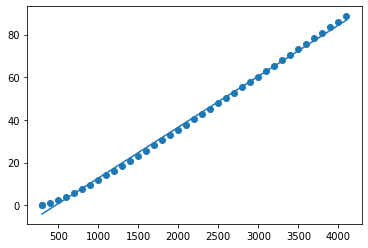

In [17]:
var = pd.read_excel('graphite_barin.xlsx')
c_temp = var['Temperature'].array
c_enthalpy = var['Enthalpy'].array

x=np.array(c_temp)
y=np.array(c_enthalpy)

a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)


In [18]:
def c_enthalpy(x):
    H_t = a*x + b
    return H_t

if T1 <= 298:
    h1_c = 0
if T1 == 300:
    h1_c = 0.016
else:
    h1_c = c_enthalpy(T1)

if T2 <= 298:
    h2_c = 0
if T2 == 300:
    h2_c = 0.016
else:
    h2_c = c_enthalpy(T2)

## Iron Enthalpy

In [19]:
def fe_enthalpy_1(T): # for T in the range of 298-1809 K 
    t = T/1000
    A = 23.97449
    B = 8.367750
    C = 0.000277
    D = -0.000088
    E = -0.000005
    F = 0.268027
    G = 62.06336
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t
def fe_enthalpy_2(T): # for T in the range of 1809-3133.345 K 
    t = T/1000
    A = 46.02400
    B = -1.884667e-8
    C = 6.094750e-9
    D = -6.640301e-10
    E = -8.246121e-9
    F = -10.80543
    G = 72.54094
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

if T2 in range(298, 1809):
    h_fe = fe_enthalpy_1(T2)
elif T2 in range(1809, 3133.345):
    h_fe = fe_enthalpy_2(T2)

## Top Gas Enthalpy

In [20]:
def co_enthalpy_1(T):  # for T in the range of 298-1300 K 
    t = T/1000
    A = 25.56759
    B = 6.096130
    C = 4.054656
    D = -2.671301
    E = 0.131021
    F = -118.0089   
    G = 227.3665
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def co_enthalpy_2(T): # for T in the range of 1300-6000 K 
    t = T/1000
    A = 35.15070
    B = 1.300095
    C = -0.205921
    D = 0.013550
    E = -3.282780
    F = -127.8375
    G = 231.7120
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

if T2 in range(298,1300):
    h_co = co_enthalpy_1(T2)
elif T2 in range(1300,6000):
    h_co = co_enthalpy_2(T2)

In [21]:
def co2_enthalpy_1(T):  # for T1 in the range of 298-1300 K 
    t = T/1000
    A = 24.99735
    B = 55.18696
    C = -33.69137
    D = 7.948387
    E = -0.136638
    F = -403.6075   
    G = 228.2431
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

def co2_enthalpy_2(T): # for T2 in the range of 1300-6000 K 
    t = T/1000
    A = 58.16639
    B = 2.720074
    C = -0.492289
    D = 0.038844
    E = -6.447293
    F = -425.9186
    G = 263.6125
    H_t = A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F
    return H_t

if T2 in range(298,1200):
    h_co2 = co2_enthalpy_1(T2)
elif T2 in range(1200,6000):
    h_co2 = co2_enthalpy_2(T2)

# Heat Required For The Blast Furnace

In [22]:
Q = (soln[ns4_co]*h_co + soln[ns4_co2]*h_co2 + soln[ns6_al2o3]*h2_al2o3 + soln[ns6_sio2]*h2_sio2 + soln[ns4_n2]*h2_n2 
     + soln[ns5_c]*h2_c + soln[ns5_fe]*h_fe - soln[ne1_fe2o3]*h_fe2o3 - soln[ne2_o2]*h_o2 - soln[ne2_n2]*h1_n2 - 
     soln[ne1_sio2]*h1_sio2 - soln[ne1_al2o3]*h1_al2o3 - soln[ne3_c]*h1_c - soln[ne3_sio2]*h1_sio2)

print("Heat required for the blast furnace:", Q) #kJ/s

Heat required for the blast furnace: -1110.00304211598


# Emissions Analysis
what is the carbon footprint? In the US, 379 grams of CO2 per kWH. There will be two sources of emissions in this present calculator. First, the heat required to run the blast furnace which is given in the above cell and the emissions from producing the actual biocoke.

In [23]:
hours_of_bf_use = 1 # hour
co2_emissions = 379 # gCO2/kWH
energy_bf_kWH = Q*hours_of_bf_use/3600 # kWH
biocoke_prod = 6.6606886 # amount of biocoke produced mol
biocoke_ratio = soln[ne3_c]/biocoke_prod # ratio between amount of coke needed and experimental biocoke produced
energy_coke_kWH = biocoke_ratio*(0.598522814 + 0.031603) # energy from the 2 different dehydration

co2_prod_heat = co2_emissions*energy_bf_kWH/1e6 # tons of CO2 produced in this furnace
co2_prod_coke = co2_emissions*energy_coke_kWH/1e6 # tons of CO2 produced through biocoke

co2_per_ton_iron = (co2_prod_heat + co2_prod_coke)/fe_ton_s

print("the amount of CO2 produce per ton of iron:", co2_per_ton_iron)

the amount of CO2 produce per ton of iron: 0.00109294149849650
